<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab10_ProblemaGeneral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Taller de metodos computacionales

# Proyectiles con rozamiento y viento


Un proyectil es lanzado desde una posición (xo, yo), en presencia de viento y fuerza de fricción. Suponer que el efecto del viento sobre el proyectil es
el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Si $\vec{u} $ es la velocidad del viento y $\alpha$ el ángulo que hace direccion de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones de movimiento:

\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_y-u\sin \alpha )
\end{equation}


Para un proyectil lanzado con una rapidez $v_0$  y un ángulo $\theta_0$,
se enecuentra que la solución a la ecuación diferencial viene dada por:


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


Problema.

1. Escribir un programa en python que resuelva la ecuacion diferencial del movimiento del proeyctil y comprobar la solución con la solución teórica. Para ello realice una grafica de la trayectoria y comprueba que la soución numérica coincide con la solucion teórica. Compruebe su solución para $b=0.05$, $theta=60^{o}$, $u=v_0/2$, $\alpha=\pi$, $vo=50m/s$


2. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numericamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

3. Construya una  gráfica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados

4. Realice un ajuste a la curva construida en el apartado anterior.

5. Se denomina ángulo crítico, aquel  ángulo para el cual el alcance máximo es cero.  Para ello, se pide resolver el sistema no lineal de ecuaciones para $t$ y $\theta$  con  $x=0$, $y=0$. Representar para $\theta=0.9\theta_c$, $\theta=\theta_c$, $\theta=1.1\theta_c$.

6. Construya la trayectoria seguida por la partícula para $\theta=10^{o}, 15^{o}, 20^{o}, ...45^{o}$.

7. Determine el máximo de cada unas de las trayectorias anteriores, y construya una gráfica de los máximos como función del ángulo.



Solucion teorica

In [590]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import CubicSpline
from scipy.optimize import fsolve
from scipy import optimize

# 1.

In [624]:
# Condiciones iniciales

b = 0.05
v0 = 50
u = v0/2
alpha = np.pi
g = 9.8
theta = np.degrees(60)

In [625]:
# Velocidades iniciales

vx = v0 * np.cos(theta)
vy = v0 * np.sin(theta) # dejarlo en grados

ci = np.array([0,0,vx,vy]) #(x0,y0,vx,vy) parte del reposo

In [626]:
tv = optimize.bisect(pos_y, 0.1, 10,args = theta_2)

In [627]:
t = np.linspace(0,tv,100) # en base al tiempo de vuelo

In [628]:
def movimiento(y,t,b,alpha,u,g):
  posicion = np.array([y[2], y[3],-b*(y[2]-u*np.cos(alpha)),-g-b*(y[3]-u*np.sin(alpha))])
  return posicion

In [629]:
def teorica(u,alpha,t,b,v0,theta,g):
  x = t*(u*np.cos(alpha)) + 1/b*(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp(-b*t))

  y = 1/b*((g/b)+v0*np.sin(theta)-u*np.sin(alpha))*(1-np.exp(-b*t))-((g/b)-u*np.sin(alpha))*t
  return np.array([x,y])

In [630]:
sol = odeint(movimiento, ci, t,args=(b,alpha,u,g))
x,y = teorica(u,alpha,t,b,v0,theta,g)

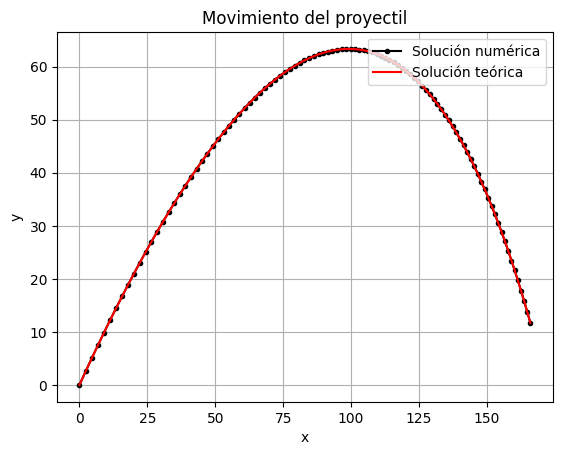

In [631]:
plt.plot(sol[:,0],sol[:,1],".-k",label="Solución numérica")
plt.plot(x,y,c="r",label="Solución teórica")
plt.legend(loc="upper right")
plt.title("Movimiento del proyectil")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

# 2.

In [632]:
theta_2 = np.deg2rad(45)

In [633]:
pos_y = lambda t,theta_2: 1/b*(g/b+v0*np.sin(theta_2)-u*np.sin(alpha))*(1-np.exp(-b*t))-(g/b-u*np.sin(alpha))*t

pos_x = lambda t,theta_2: t*(u*np.cos(alpha)) + 1/b*(v0*np.cos(theta_2)-u*np.cos(alpha))*(1-np.exp(-b*t))

In [634]:
tv = optimize.bisect(pos_y, 0.1, 15,args = theta_2)
tv  # cuando y=0

6.827653967592949

In [635]:
pos_x(tv,theta_2) # concuerda con la gráfica

178.4198184469119

# 3.

In [603]:
angulos = np.deg2rad(np.arange(10, 85, 5))

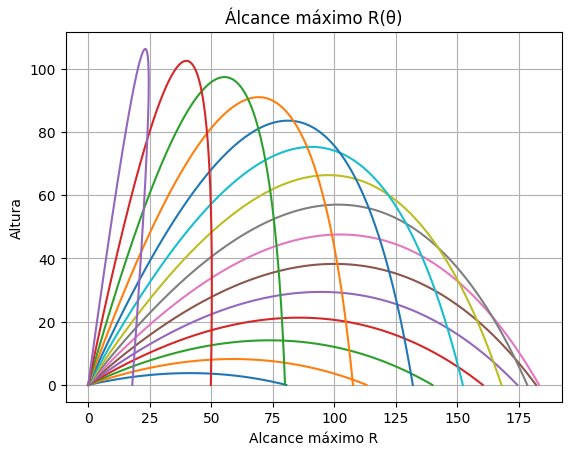

In [604]:
# Gráfico

for i in angulos:
  valor = optimize.bisect(pos_y, 0.1, 15,args=i) # 15 raíces, ya que hay 15 ángulos
  t_evaluar = np.linspace(0,valor,1000)
  y_nuevo= pos_y(t_evaluar,i)
  x_nuevo= pos_x(t_evaluar,i)
  plt.plot(x_nuevo, y_nuevo)

plt.title("Álcance máximo R(θ)")
plt.xlabel("Alcance máximo R")
plt.ylabel("Altura")
plt.grid()

# 4.

In [605]:
alcances_m = np.zeros(len(angulos))

for j,i in enumerate(angulos):
  valor = optimize.bisect(pos_y, 0.1, 15,args=i) # 15 raíces, ya que hay 15 ángulos
  alcances = pos_x(valor,i)
  alcances_m[j] = alcances

In [606]:
spline = CubicSpline(angulos, alcances_m)

angulos_intervalo = np.linspace(angulos.min(), angulos.max(), 100) # orden de los puntos
alcances_nuevos = spline(angulos_intervalo)

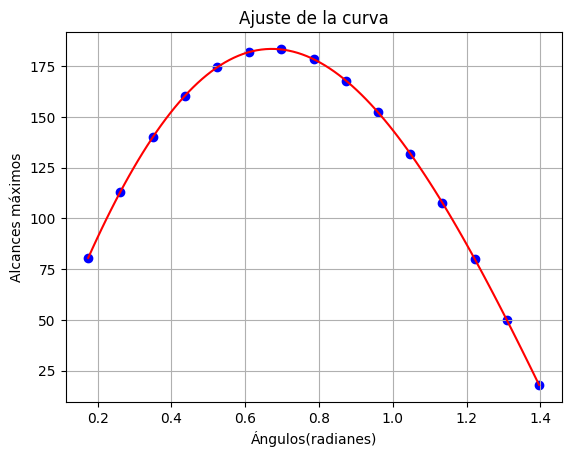

In [607]:
plt.scatter(angulos,alcances_m,c="b")
plt.plot(angulos_intervalo,alcances_nuevos,c="r")
plt.title("Ajuste de la curva")
plt.xlabel("Ángulos(radianes)")
plt.ylabel("Alcances máximos")
plt.grid()

# 5.

In [608]:
# Condiciones anteriores

b = 0.05
v0 = 50
u = v0/2
alpha = np.pi
g = 9.8

In [609]:
def x_criticos(variables):
  theta_c,t_ = variables
  e1 = t_*(u*np.cos(alpha)) + 1/b*(v0*np.cos(theta_c)-u*np.cos(alpha))*(1-np.exp(-b*t_))
  return [e1,e1]

In [610]:
def y_criticos(variables):
  theta_c,t_ = variables
  e2 = 1/b*((g/b)+v0*np.sin(theta_c)-u*np.sin(alpha))*(1-np.exp(-b*t_))-((g/b)-u*np.sin(alpha))*t_
  return [e2,e2]


In [611]:
soluciones_x = fsolve(x_criticos, (1,1)) # suponiendo el valor inicial (1,1)
soluciones_x

array([1.03064963, 0.        ])

In [612]:
soluciones_y = fsolve(y_criticos, (1,1))
soluciones_y

array([1.48134186e+00, 5.58536792e-11])

In [613]:
# Representaciones para x

r1_x = soluciones_x[0]
r2_x = 0.9*soluciones_x[0]
r3_x = 1.10*soluciones_x[0]

np.rad2deg((r1_x,r2_x,r3_x))

array([59.05187416, 53.14668675, 64.95706158])

In [614]:
# Representaciones para y

r1_y = soluciones_y[0]
r2_y = 0.9*soluciones_y[0]
r3_y = 1.10*soluciones_y[0]

np.rad2deg((r1_y,r2_y,r3_y)) # con estos sirve

array([84.87463651, 76.38717286, 93.36210016])

In [615]:
# Tiempos de vuelo para cada ángulo

tiempo_vuelo1 = optimize.bisect(pos_y, 0.1, 10,args = r1_y)
tiempo_vuelo2 = optimize.bisect(pos_y, 0.1, 10,args = r2_y)
tiempo_vuelo3 = optimize.bisect(pos_y, 0.1, 10,args = r3_y)

In [616]:
t1_angulos = np.linspace(0,tiempo_vuelo1,100)
variables_1 = (r1_y,t1_angulos)

In [617]:
t2_angulos = np.linspace(0,tiempo_vuelo2,100)
variables_2 = (r2_y,t2_angulos)

In [618]:
t3_angulos = np.linspace(0,tiempo_vuelo3,100)
variables_3 = (r3_y,t3_angulos)

In [619]:
x_1 = x_criticos(variables_1)[0]
y_1 = y_criticos(variables_1)[0]

x_2 = x_criticos(variables_2)[0]
y_2 = y_criticos(variables_2)[0]


x_3 = x_criticos(variables_3)[0]
y_3 = y_criticos(variables_3)[0]

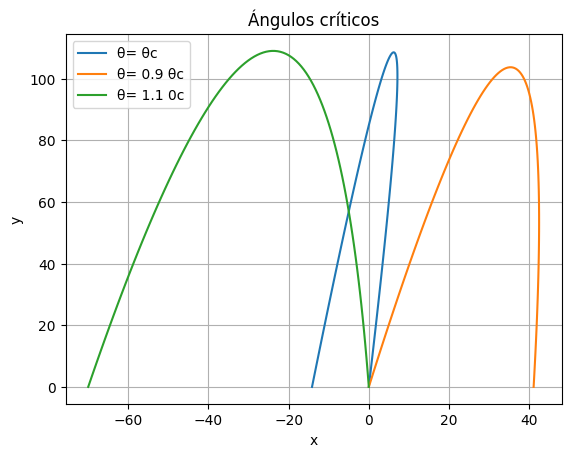

In [620]:
plt.plot(x_1,y_1,label="θ= θc")
plt.plot(x_2,y_2,label="θ= 0.9 θc")
plt.plot(x_3,y_3,label="θ= 1.1 0c")
plt.title("Ángulos críticos")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

# 6.

In [621]:
trayectorias = np.deg2rad(np.arange(10, 50, 5))

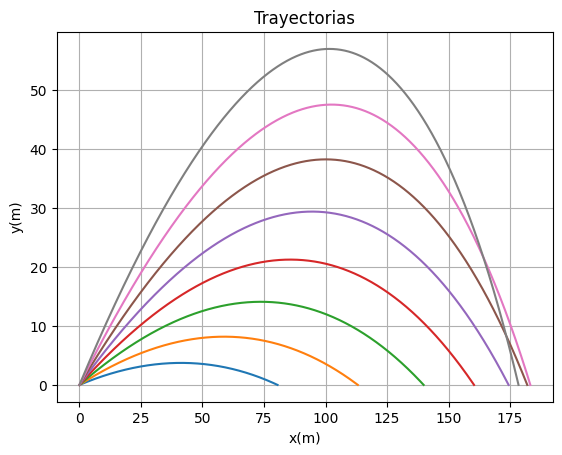

In [622]:
# Trayectorias para varios ángulos 5 en cinco

for i in trayectorias:
  valor = optimize.bisect(pos_y, 0.1, 8,args=i) # 8 raíces, ya que hay 8 ángulos
  t_evaluar = np.linspace(0,valor,1000) # valor es tiempo de vuelo
  y_nuevo= pos_y(t_evaluar,i)
  x_nuevo= pos_x(t_evaluar,i)
  plt.plot(x_nuevo, y_nuevo)

plt.title("Trayectorias")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.grid()

# 7.

[ 80.49846714 113.12515886 139.86199269 160.34452064 174.38788563
 181.97252546 183.22859152 178.41981845]


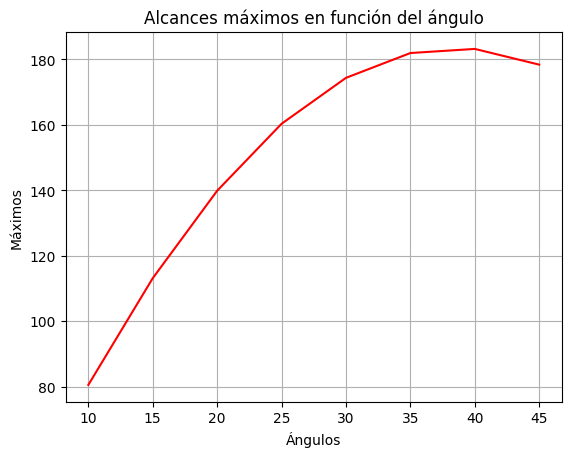

In [623]:
maximos = np.zeros(len(trayectorias))

for j,i in enumerate(trayectorias):
  valor = optimize.bisect(pos_y, 0.1, 8,args=i)
  alcances = pos_x(valor,i)
  maximos[j] = alcances

print(maximos)
plt.plot(np.arange(10, 50, 5),maximos,c="r")
plt.title("Alcances máximos en función del ángulo")
plt.xlabel("Ángulos")
plt.ylabel("Máximos")
plt.grid()